In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdullah75f","key":"23cca06bbdad2eec6a1bd427d1c12dfd"}'}

In [ ]:
# Make directory for Kaggle API credentials
!mkdir -p ~/.kaggle

# Move the kaggle.json to the correct folder
!cp kaggle.json ~/.kaggle/

# Set permissions for the Kaggle API key
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install opencv-python-headless
!pip install pycocotools
!pip install torch torchvision torchaudio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
!kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 96% 58.0M/60.3M [00:01<00:00, 45.5MB/s]
100% 60.3M/60.3M [00:01<00:00, 32.1MB/s]


In [ ]:
import zipfile
import os

# Path to the downloaded zip file (you can find it in the default directory in Colab)
zip_path = "fer2013.zip"  # Make sure this path matches the location of the downloaded zip
extract_dir = "/content/fer2013"   # Directory to extract files to

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Check if extraction was successful
os.listdir(extract_dir)  # This will show the extracted files and directories

['train', 'test']

Training data shape: (28709, 48, 48)
Test data shape: (7178, 48, 48)


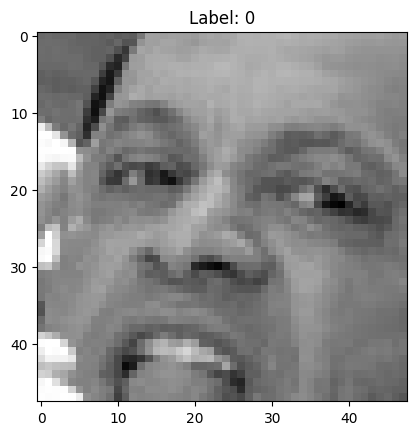

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2

# Function to preprocess images from the folder structure
def preprocess_images(image_dir):
    images = []
    labels = []
    emotion_labels = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}

    # Loop through each emotion folder
    for emotion, label in emotion_labels.items():
        emotion_dir = os.path.join(image_dir, emotion)

        # Loop through each image in the emotion folder
        for image_name in os.listdir(emotion_dir):
            image_path = os.path.join(emotion_dir, image_name)

            # Read the image
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (48, 48))  # Resize to 48x48
            images.append(img)
            labels.append(label)

    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Normalize images
    images = images / 255.0  # Normalize images to [0, 1]

    return images, labels

# Example usage:
train_dir = "fer2013/train"  # Path to the training images
test_dir = "fer2013/test"    # Path to the testing images

# Preprocess training and testing data
X_train, y_train = preprocess_images(train_dir)
X_test, y_test = preprocess_images(test_dir)

# Print some details about the data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Example: Display a sample image
sample_idx = 0  # Index of the sample image
sample_image = X_train[sample_idx]  # Sample image from your preprocessed data

# Convert back to color to visualize
sample_image = np.uint8(sample_image * 255)  # Denormalize for display
plt.imshow(sample_image, cmap="gray")
plt.title(f"Label: {y_train[sample_idx]}")
plt.show()


In [ ]:
import os
import shutil

# Define the paths for images and labels
image_dir = "/content/images"
label_dir = "/content/labels"

# Create the directories for images and labels
os.makedirs(os.path.join(image_dir, "train"), exist_ok=True)
os.makedirs(os.path.join(image_dir, "test"), exist_ok=True)
os.makedirs(os.path.join(label_dir, "train"), exist_ok=True)
os.makedirs(os.path.join(label_dir, "test"), exist_ok=True)

# Function to copy the preprocessed images to the new directory
def copy_images(src_dir, dest_dir):
    for emotion in os.listdir(src_dir):
        emotion_path = os.path.join(src_dir, emotion)
        if os.path.isdir(emotion_path):
            # Create the subdirectories for emotions in the new folder
            os.makedirs(os.path.join(dest_dir, emotion), exist_ok=True)
            for img_name in os.listdir(emotion_path):
                img_path = os.path.join(emotion_path, img_name)
                # Move the image to the corresponding emotion folder
                shutil.copy(img_path, os.path.join(dest_dir, emotion, img_name))

# Copy images to train and test directories
copy_images("fer2013/train", os.path.join(image_dir, "train"))
copy_images("fer2013/test", os.path.join(image_dir, "test"))



In [ ]:
import os
import cv2

# Emotion to class id mapping
emotion_labels = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}

# Function to create YOLO label for an image
def create_yolo_label(img, emotion, label_dir, img_name):
    # Image dimensions
    height, width, _ = img.shape

    # Normalize bounding box coordinates (bounding box is the whole image)
    x_center = 0.5  # Center is in the middle of the image
    y_center = 0.5
    box_width = 1.0  # Full width
    box_height = 1.0  # Full height

    # Create the emotion folder if it doesn't exist
    emotion_folder = os.path.join(label_dir, emotion)
    os.makedirs(emotion_folder, exist_ok=True)

    # Create the label file inside the emotion folder
    label_file = os.path.join(emotion_folder, f"{img_name.split('.')[0]}.txt")
    with open(label_file, 'w') as f:
        # Write the class and bounding box data in YOLO format
        class_id = emotion_labels[emotion]  # Emotion label to class ID
        f.write(f"{class_id} {x_center} {y_center} {box_width} {box_height}\n")

# Function to generate YOLO labels for all images in the dataset
def generate_yolo_labels(image_dir, label_dir):
    for emotion in os.listdir(image_dir):
        emotion_path = os.path.join(image_dir, emotion)
        if os.path.isdir(emotion_path):
            for img_name in os.listdir(emotion_path):
                img_path = os.path.join(emotion_path, img_name)
                img = cv2.imread(img_path)

                # Create YOLO label for the image
                create_yolo_label(img, emotion, label_dir, img_name)

# Define paths to images and labels
image_dir = "/content/images"  # Path to your images folder
label_dir = "/content/labels"  # Path to store label files

# Generate YOLO labels for both train and test datasets
generate_yolo_labels(os.path.join(image_dir, "train"), os.path.join(label_dir, "train"))
generate_yolo_labels(os.path.join(image_dir, "test"), os.path.join(label_dir, "test"))

In [1]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [2]:
from ultralytics import YOLO

# Load YOLOv8 model (you can replace 'yolov8n.pt' with any other model)
model = YOLO("yolov8n.pt")  # Use a pre-trained model (e.g., yolov8n.pt for a small version)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 72.7MB/s]


In [ ]:
# Create the data.yaml file
data_yaml_content = """
train: /content/images/train  # Path to your training images
val: /content/images/test  # Path to your testing images

# Define the classes (the emotions)
names:
  0: 'angry'
  1: 'disgust'
  2: 'fear'
  3: 'happy'
  4: 'neutral'
  5: 'sad'
  6: 'surprise'
"""

# Save to a file named data.yaml
with open("/content/data.yaml", "w") as f:
    f.write(data_yaml_content)


In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model (Nano for speed, switch to 'yolov8s.pt' for better accuracy)
model = YOLO("yolov8n.pt")

# Train the model with optimizations
model.train(
    data='/content/data.yaml',  # Path to dataset config
    epochs=20,                 # Number of training epochs
    batch=16,                   # Batch size (adjust based on memory)
    imgsz=416,                   # Image size (lower than 640 for speed)
    device='cuda',               # Use GPU (ensure T4 is active)
    amp=True                     # Enable mixed precision for faster training
)


Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

100%|██████████| 755k/755k [00:00<00:00, 44.5MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 173MB/s]


AMP: checks passed ✅


train: Scanning /content/labels/train/angry... 28709 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28709/28709 [00:12<00:00, 2347.02it/s]


train: New cache created: /content/labels/train/angry.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/labels/test/angry... 7178 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7178/7178 [00:03<00:00, 1869.15it/s]


val: New cache created: /content/labels/test/angry.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20     0.998G     0.1283      1.768     0.9249         16        416: 100%|██████████| 1795/1795 [04:58<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:42<00:00,  5.34it/s]


                   all       7178       7178      0.457      0.611      0.386      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      1.24G    0.09043      1.331      0.894         17        416: 100%|██████████| 1795/1795 [04:52<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:40<00:00,  5.53it/s]


                   all       7178       7178      0.452      0.586      0.443      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      1.26G    0.07947      1.266      0.891         20        416: 100%|██████████| 1795/1795 [04:49<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:40<00:00,  5.57it/s]


                   all       7178       7178      0.532      0.531      0.462      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      1.28G    0.07076      1.236     0.8907         15        416: 100%|██████████| 1795/1795 [04:50<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:40<00:00,  5.54it/s]

                   all       7178       7178      0.551      0.588      0.497      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      1.29G        inf      1.213     0.8886         16        416: 100%|██████████| 1795/1795 [04:47<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:39<00:00,  5.67it/s]

                   all       7178       7178      0.494      0.579      0.495      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      1.31G    0.05793       1.19     0.8882         11        416: 100%|██████████| 1795/1795 [04:47<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:39<00:00,  5.64it/s]

                   all       7178       7178      0.544       0.59      0.519      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      1.33G        inf       1.17     0.8873         13        416: 100%|██████████| 1795/1795 [04:45<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:39<00:00,  5.72it/s]

                   all       7178       7178      0.581       0.58      0.548      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      1.35G    0.04908      1.153     0.8872         17        416: 100%|██████████| 1795/1795 [04:44<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:39<00:00,  5.68it/s]

                   all       7178       7178      0.601      0.585      0.555      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      1.36G    0.04649       1.14     0.8857         14        416: 100%|██████████| 1795/1795 [04:43<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:39<00:00,  5.69it/s]

                   all       7178       7178       0.59      0.599       0.56      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      1.38G        inf      1.125     0.8856         15        416: 100%|██████████| 1795/1795 [04:45<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:39<00:00,  5.73it/s]

                   all       7178       7178      0.623      0.599      0.586      0.586


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20       1.4G    0.03809     0.9233      0.901          5        416: 100%|██████████| 1795/1795 [04:32<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:39<00:00,  5.72it/s]

                   all       7178       7178      0.617      0.599       0.58      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      1.42G    0.03137     0.8781     0.8988          5        416: 100%|██████████| 1795/1795 [04:30<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:39<00:00,  5.70it/s]

                   all       7178       7178      0.637      0.602      0.598      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      1.43G     0.0282     0.8429      0.898          5        416: 100%|██████████| 1795/1795 [04:30<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:39<00:00,  5.73it/s]

                   all       7178       7178      0.661      0.589      0.615      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      1.45G    0.02513     0.8222      0.898          5        416: 100%|██████████| 1795/1795 [04:29<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:39<00:00,  5.71it/s]

                   all       7178       7178      0.663      0.604      0.632      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      1.47G    0.02214     0.7949     0.8986          5        416: 100%|██████████| 1795/1795 [04:27<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:39<00:00,  5.76it/s]

                   all       7178       7178       0.53      0.705      0.637      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      1.48G    0.02052      0.774      0.897          5        416: 100%|██████████| 1795/1795 [04:30<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:39<00:00,  5.71it/s]

                   all       7178       7178       0.54       0.71      0.642       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      1.49G     0.0189     0.7503     0.8978          5        416: 100%|██████████| 1795/1795 [04:28<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:39<00:00,  5.77it/s]

                   all       7178       7178      0.562      0.695      0.653      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      1.52G    0.01736     0.7347     0.8985          5        416: 100%|██████████| 1795/1795 [04:26<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:38<00:00,  5.77it/s]

                   all       7178       7178      0.571      0.694      0.663      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      1.54G        inf     0.7162     0.8974          5        416: 100%|██████████| 1795/1795 [04:28<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:39<00:00,  5.77it/s]

                   all       7178       7178      0.594      0.679      0.662       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      1.55G     0.0148     0.7019     0.8978          5        416: 100%|██████████| 1795/1795 [04:25<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:38<00:00,  5.85it/s]

                   all       7178       7178      0.602      0.679      0.668      0.667



20 epochs completed in 1.772 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 225/225 [00:43<00:00,  5.22it/s]


                   all       7178       7178        0.6      0.681      0.668      0.667
                 angry        958        958      0.547      0.668      0.657      0.656
               disgust        111        111      0.575      0.317      0.392      0.392
                  fear       1024       1024      0.459      0.541      0.515      0.515
                 happy       1774       1774      0.854       0.91      0.949      0.949
               neutral       1233       1233      0.551      0.766      0.696      0.696
                   sad       1247       1247      0.501      0.709       0.61       0.61
              surprise        831        831      0.713      0.858      0.855      0.852
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c270f4f2d90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

In [ ]:
import os
import shutil

# Define the source model file and destination directory in Google Drive
source_path = 'runs/detect/train/weights/best.pt'
destination_folder = '/content/drive/MyDrive/best/'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Define the full path for the model in the destination folder
destination_path = os.path.join(destination_folder, 'best.pt')

# Copy the model to the destination
shutil.copy(source_path, destination_path)

print("Model copied to Google Drive successfully!")


Model copied to Google Drive successfully!


Saving photo_2025-03-18 13.24.34.jpeg to photo_2025-03-18 13.24.34.jpeg

0: 288x416 1 happy, 258.3ms
Speed: 30.5ms preprocess, 258.3ms inference, 30.1ms postprocess per image at shape (1, 3, 288, 416)
Results saved to runs/detect/predict


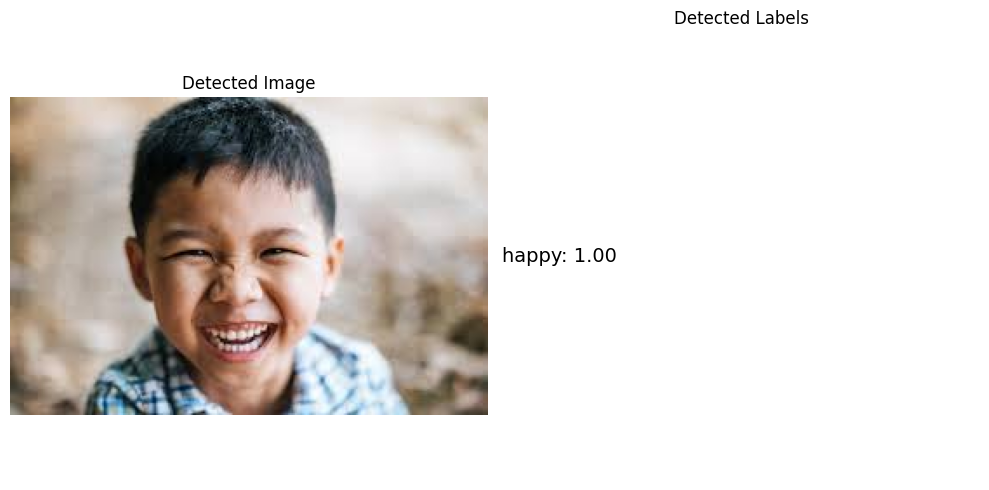

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import files
from PIL import Image

# Load trained YOLO model
model = YOLO('/content/best.pt')

# Upload multiple images
uploaded_files = files.upload()  # Opens file picker

# Get list of uploaded image paths
image_paths = list(uploaded_files.keys())

# Run predictions on all uploaded images
results = model(image_paths, save=True)

# Plot images with detected labels
fig, axes = plt.subplots(len(image_paths), 2, figsize=(10, 5 * len(image_paths)))

if len(image_paths) == 1:
    axes = [axes]  # Ensure axes is always iterable for one image

for idx, image_path in enumerate(image_paths):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct display

    # Get detections for this image
    boxes = results[idx].boxes.xyxy  # Bounding box coordinates
    classes = results[idx].boxes.cls  # Predicted class IDs
    confs = results[idx].boxes.conf  # Confidence scores
    class_names = model.names  # Class names

    # Display original image
    axes[idx][0].imshow(img)
    axes[idx][0].axis("off")
    axes[idx][0].set_title("Detected Image")

    # Prepare label text
    label_text = "\n".join(
        [f"{class_names[int(cls)]}: {conf:.2f}" for cls, conf in zip(classes, confs)]
    )

    # Show labels on the right
    axes[idx][1].text(0, 0.5, label_text, fontsize=14, verticalalignment='center')
    axes[idx][1].axis("off")
    axes[idx][1].set_title("Detected Labels")

plt.tight_layout()
plt.show()
